In [3]:
!pip install librosa

In [4]:
!pip install keras

In [5]:
import pandas as pd
import numpy as np
import time
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio, display
import warnings
warnings.filterwarnings('ignore')

In [6]:
paths = []
labels = []
for dirname, _, filenames in os.walk(r'C:\Users\Rohan\Desktop\Audio_Data'):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename.lower()))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())

In [7]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

speech  label
0  C:\Users\Rohan\Desktop\Audio_Data\TESS Toronto...  angry
1  C:\Users\Rohan\Desktop\Audio_Data\TESS Toronto...  angry
2  C:\Users\Rohan\Desktop\Audio_Data\TESS Toronto...  angry
3  C:\Users\Rohan\Desktop\Audio_Data\TESS Toronto...  angry
4  C:\Users\Rohan\Desktop\Audio_Data\TESS Toronto...  angry

In [8]:
df['label'].value_counts()

label
angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: count, dtype: int64

## Exploratory Data Analysis

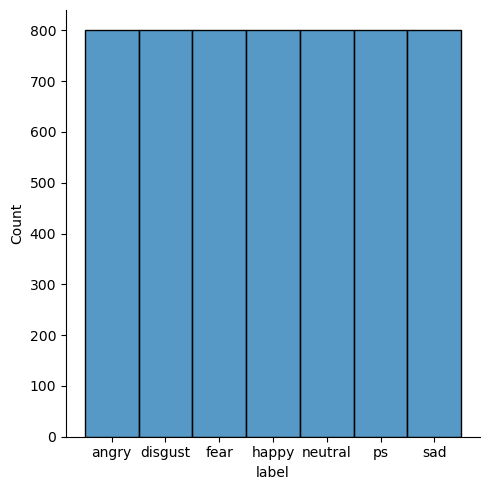

In [9]:
sns.displot(df['label'])

In [10]:
def waveplot(data, sr, emotion):
    plt.figure(figsize = (10, 4))
    plt.title(emotion, size = 20)
    librosa.display.waveshow(data, sr=sr, color="blue")
    plt.show()
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize = (11,4))
    plt.title(emotion, size = 20)
    librosa.display.specshow(xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
    plt.colorbar()

In [11]:
df['label'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad'],
      dtype=object)

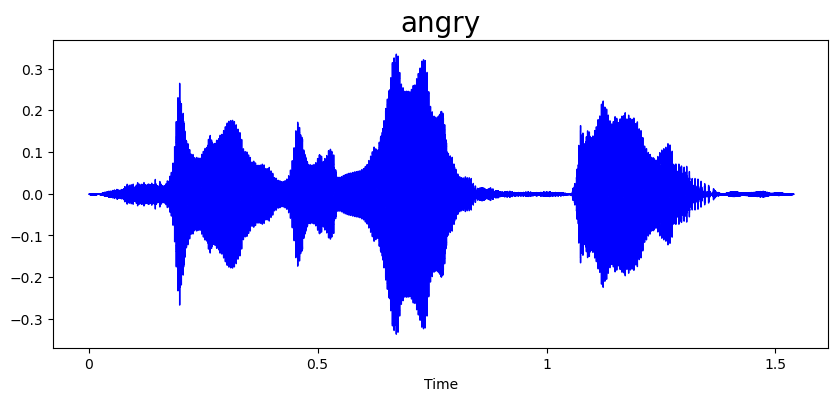

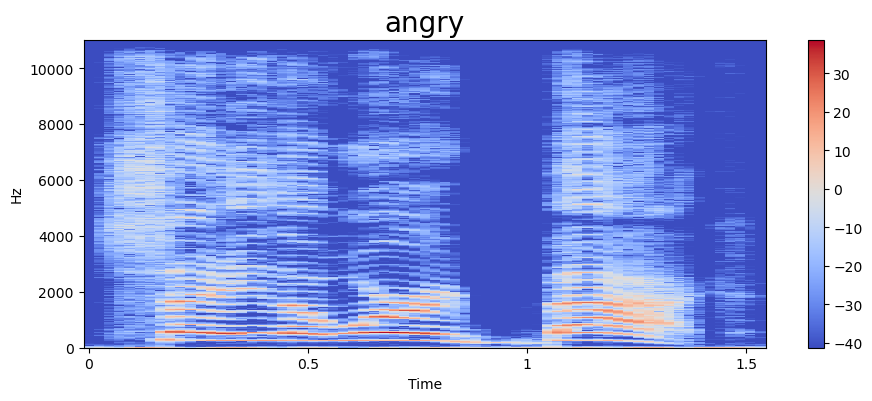

In [12]:
emotion = 'angry' 
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

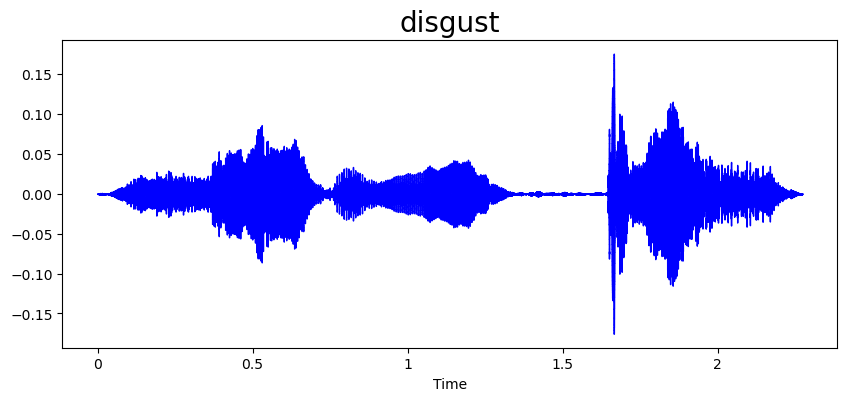

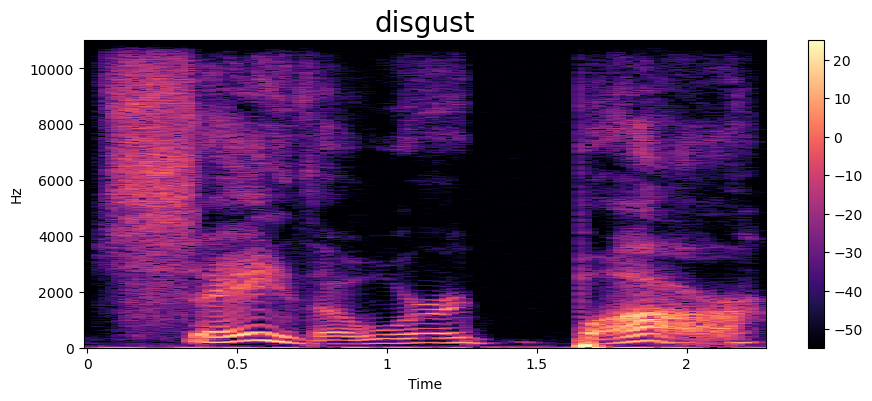

In [13]:
emotion = 'disgust' 
path = np.array(df['speech'][df['label'] == emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

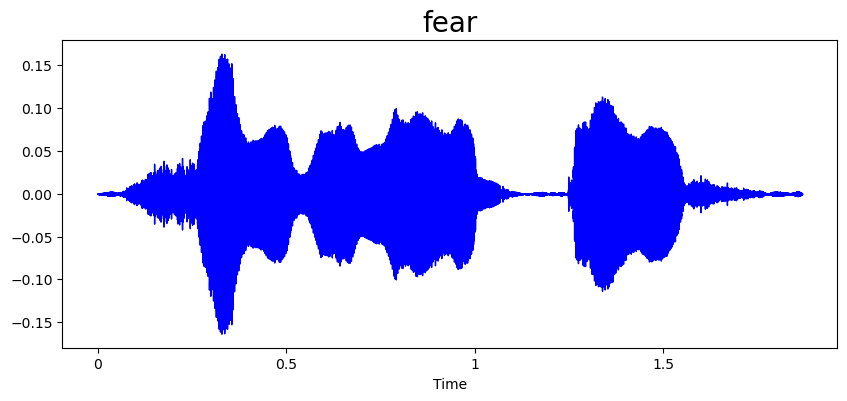

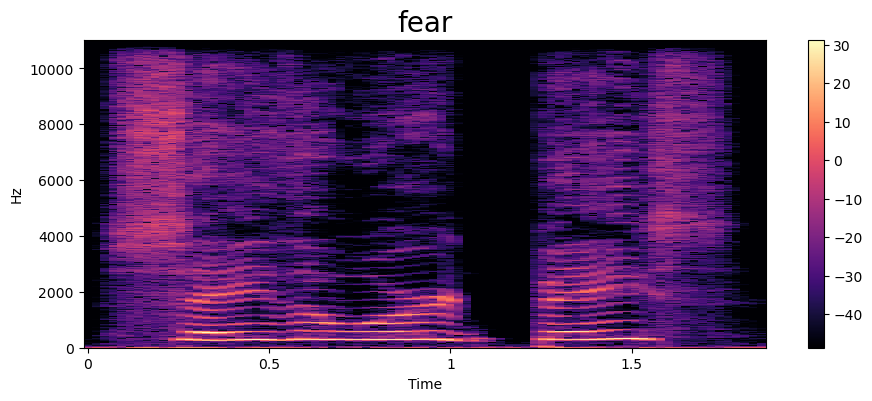

In [14]:
emotion = 'fear' 
path = np.array(df['speech'][df['label'] == emotion])[2]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

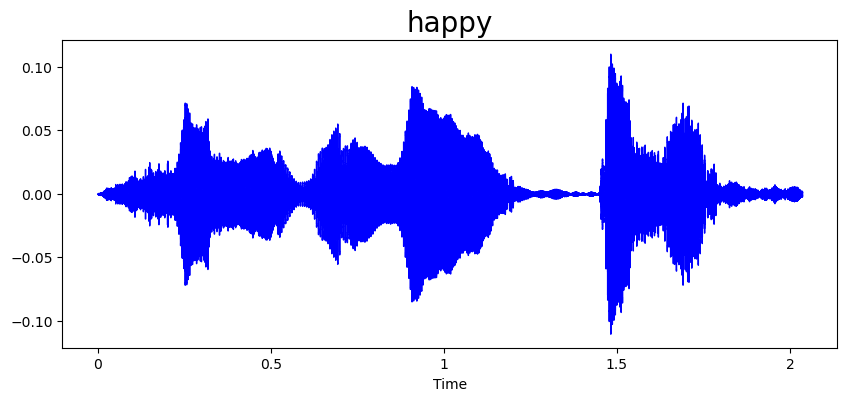

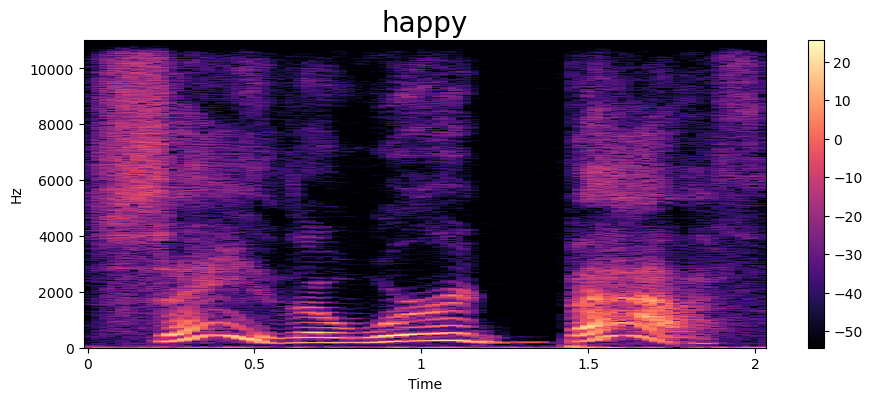

In [15]:
emotion = 'happy' 
path = np.array(df['speech'][df['label'] == emotion])[3]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

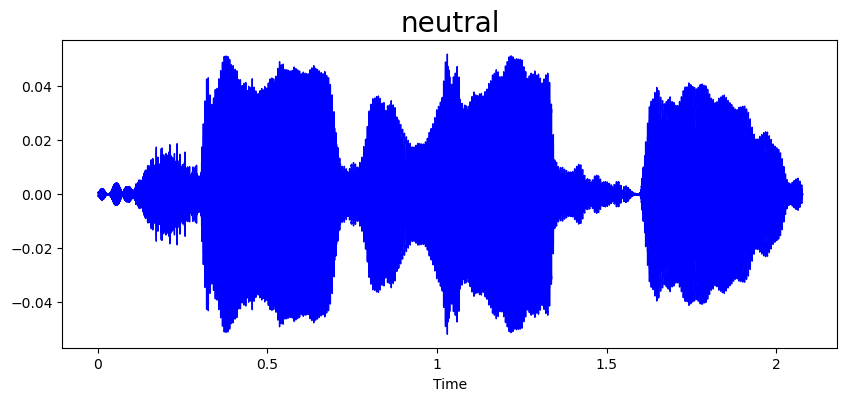

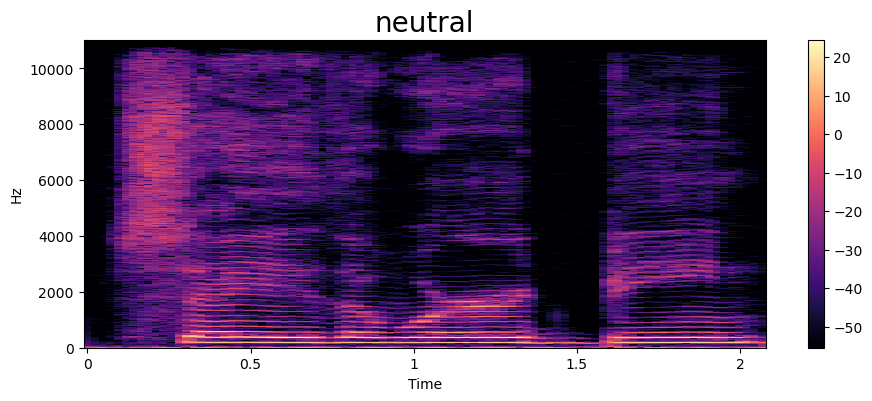

In [16]:
emotion = 'neutral' 
path = np.array(df['speech'][df['label'] == emotion])[4]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

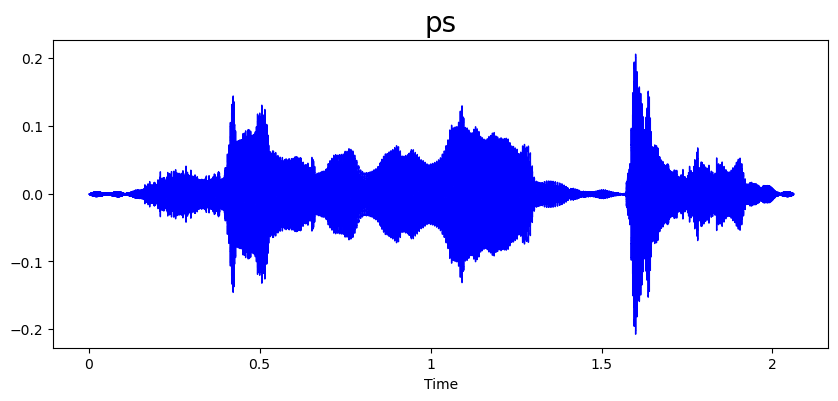

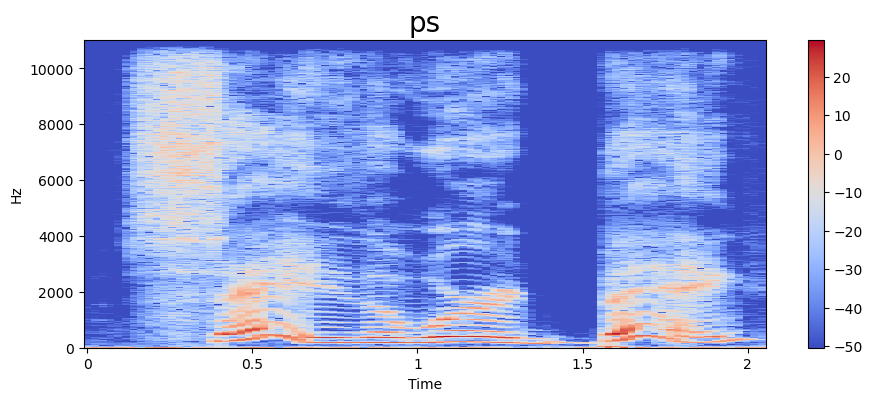

In [17]:
emotion = 'ps' ##pleasant surprise - ps
path = np.array(df['speech'][df['label'] == emotion])[5]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

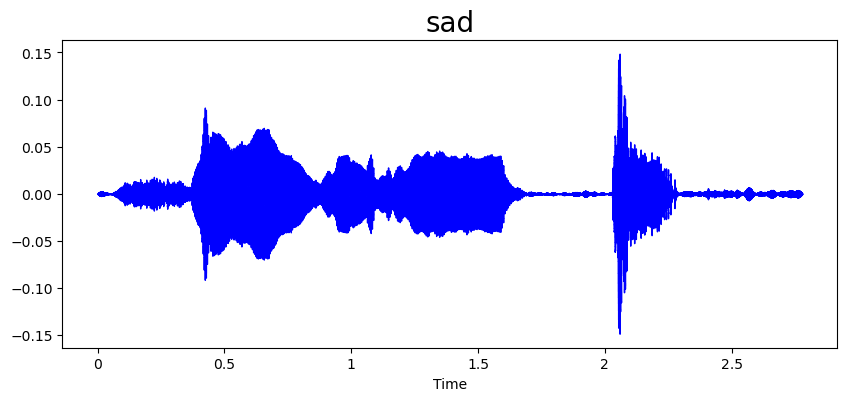

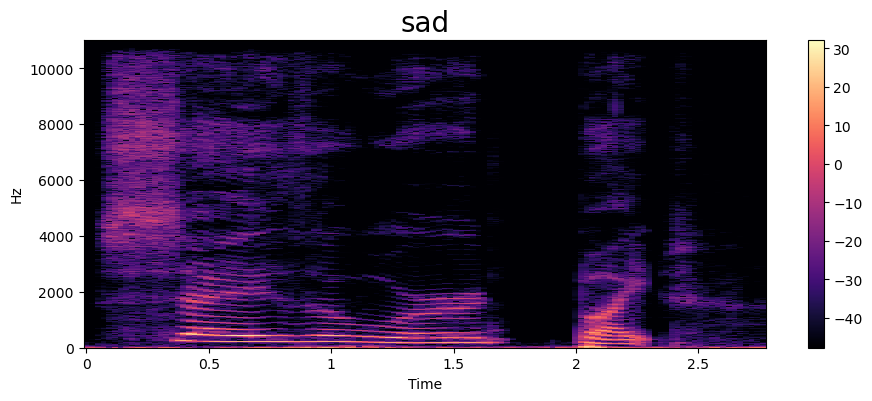

In [18]:
emotion = 'sad' 
path = np.array(df['speech'][df['label'] == emotion])[6]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [19]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc

In [20]:
extract_mfcc(df['speech'][0])

array([-3.9698621e+02,  7.7440536e+01, -1.9592791e+01, -2.1666689e+01,
       -2.1127560e+00,  1.0075363e+01, -2.0366707e+01, -6.0924492e+00,
       -7.2122831e+00, -5.5736607e-01, -1.8325531e+00,  2.0210162e-01,
        7.2755075e-01,  1.3177377e+00,  2.8863375e+00,  2.8557906e+00,
       -4.7129216e+00, -4.4365110e+00, -1.6211592e+00, -1.0239839e+01,
       -7.5512629e+00, -1.7968802e+00, -7.0376525e+00,  9.4365835e+00,
        8.3558550e+00,  2.1712360e+01,  1.9216991e+01,  2.0348930e+01,
        1.3413366e+01,  8.3391724e+00,  3.9472228e-01,  5.1113148e+00,
        9.5687389e+00,  5.4548678e+00,  2.5099635e+00, -1.8239073e+00,
        4.8689618e+00,  9.3139229e+00,  2.0891502e+00, -1.9064913e+00],
      dtype=float32)

In [21]:
type(df['speech'])

pandas.core.series.Series

In [22]:
x_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [23]:
x_mfcc[0]

array([-3.9698621e+02,  7.7440536e+01, -1.9592791e+01, -2.1666689e+01,
       -2.1127560e+00,  1.0075363e+01, -2.0366707e+01, -6.0924492e+00,
       -7.2122831e+00, -5.5736607e-01, -1.8325531e+00,  2.0210162e-01,
        7.2755075e-01,  1.3177377e+00,  2.8863375e+00,  2.8557906e+00,
       -4.7129216e+00, -4.4365110e+00, -1.6211592e+00, -1.0239839e+01,
       -7.5512629e+00, -1.7968802e+00, -7.0376525e+00,  9.4365835e+00,
        8.3558550e+00,  2.1712360e+01,  1.9216991e+01,  2.0348930e+01,
        1.3413366e+01,  8.3391724e+00,  3.9472228e-01,  5.1113148e+00,
        9.5687389e+00,  5.4548678e+00,  2.5099635e+00, -1.8239073e+00,
        4.8689618e+00,  9.3139229e+00,  2.0891502e+00, -1.9064913e+00],
      dtype=float32)

In [24]:
x = [z for z in x_mfcc]
x = np.array(x)
x = np.expand_dims(x, -1)
x.shape

(5600, 40, 1)

In [25]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [26]:
y = y.toarray()

In [27]:
y.shape

(5600, 7)

## Creating the LSTM model

In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [29]:
model = Sequential([
    LSTM(128, return_sequences = False, input_shape = (40, 1)),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(7, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 78,183 (305.40 KB)

 Trainable params: 78,183 (305.40 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(x, y, validation_split = 0.2, epochs = 100, batch_size = 512, shuffle = True)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - accuracy: 0.2069 - loss: 1.9182 - val_accuracy: 0.1821 - val_loss: 1.8932
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.3443 - loss: 1.7390 - val_accuracy: 0.2223 - val_loss: 1.8316
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.3912 - loss: 1.5549 - val_accuracy: 0.3670 - val_loss: 1.5903
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.4883 - loss: 1.3130 - val_accuracy: 0.5768 - val_loss: 1.0832
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.5705 - loss: 1.0990 - val_accuracy: 0.6509 - val_loss: 0.8225
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.6303 - loss: 0.9258 - val_accuracy: 0.7143 - val_loss: 0.6253
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.7138 - loss: 0.7239 - val_accuracy: 0.8152 - val_loss: 0.4461
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.7812 - loss: 0.5835 - val_accuracy: 0.9250 - v

## Plotting the Results

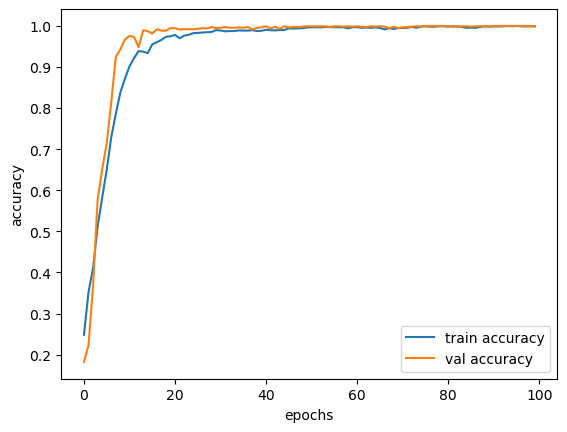

In [31]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label = 'train accuracy')
plt.plot(epochs, val_acc, label = 'val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

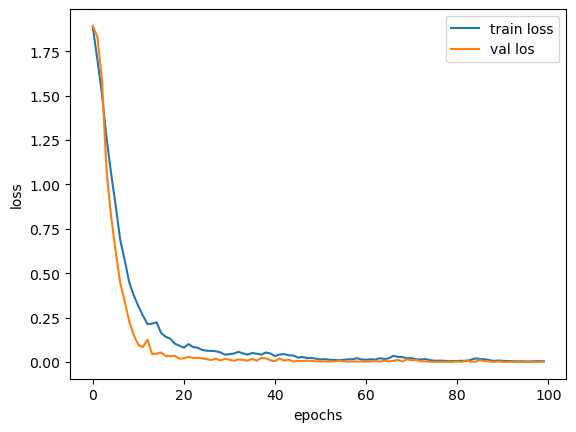

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label = 'train loss')
plt.plot(epochs, val_loss, label = 'val los')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Prediction for dynamic input

In [33]:
!pip install pyaudio

In [85]:
import pyaudio 
import wave 

audio = pyaudio.PyAudio()

stream = audio.open(format = pyaudio.paInt16, channels = 1, rate = 44100, input = True, frames_per_buffer = 1024)

frames = []

print("Recording......")

try:
    while True:
        data = stream.read(1024)
        frames.append(data)
except KeyboardInterrupt:
    print("Audio Detected Successfully")
    pass
    
stream.stop_stream()
stream.close()
audio.terminate()

sound_file = wave.open("audio_recording.wav","wb")
sound_file.setnchannels(1)
sound_file.setsampwidth(audio.get_sample_size(pyaudio.paInt16))
sound_file.setframerate(44100)
sound_file.writeframes(b''.join(frames))
sound_file.close()

Recording......
Audio Detected Successfully


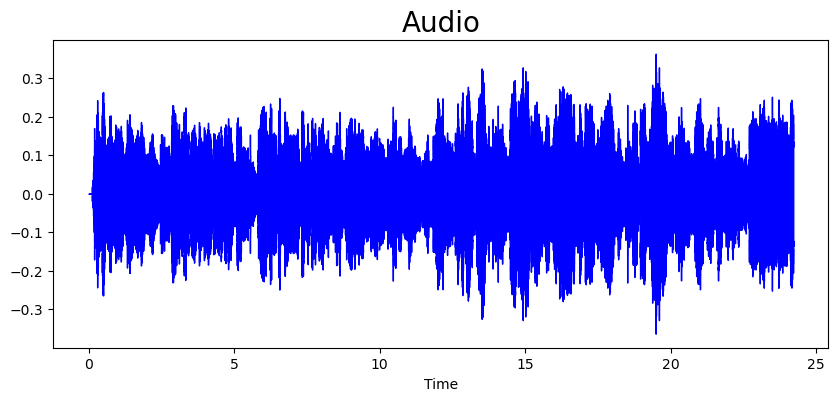

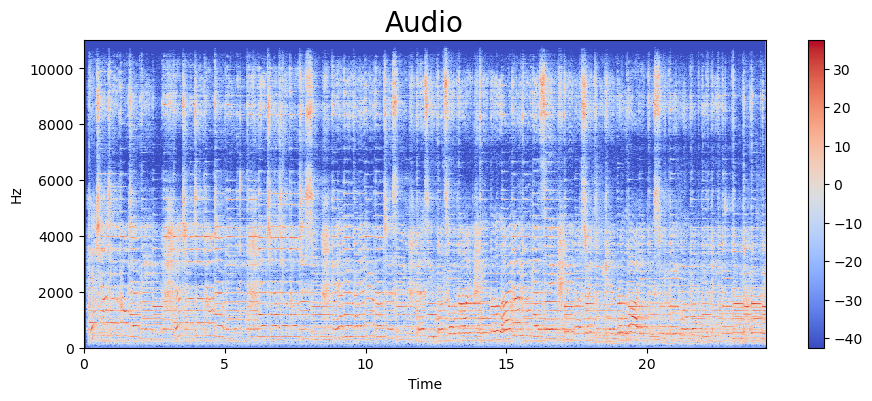

In [86]:
audio_data, audio_samplerate = librosa.load('audio_recording.wav')
audio_data = np.nan_to_num(audio_data)
waveplot(audio_data, audio_samplerate, 'Audio')
spectogram(audio_data, audio_samplerate, 'Audio')
Audio('audio_recording.wav')

In [73]:
def predict(test_path):
    test_mfcc = (pd.Series(test_path)).apply(lambda x: extract_mfcc(x))
    test_x = [z for z in test_mfcc]
    test_x = np.array(test_x)
    test_x = np.expand_dims(test_x, -1)
    predictions = model.predict(test_x)
    return predictions

In [74]:
test_path = r'audio_recording.wav'
predictions = predict(test_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [75]:
emotion_labels = np.array(df['label'].unique())
emotion_labels[5] = 'Pleasent Surprise'

In [76]:
predictions

array([[0.05383309, 0.14961429, 0.20058344, 0.0106574 , 0.47235483,
        0.0135509 , 0.09940616]], dtype=float32)

In [77]:
final_emotion_result = emotion_labels[np.argmax(predictions)]
print(f"Emotion: {final_emotion_result[0].upper() + final_emotion_result[1:].lower()}") 

Emotion: Neutral
